# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


In [4]:
# Converter colunas específicas de float64 para int64
df['age'] = df['age'].astype('int64')
df['sex'] = df['sex'].astype('int64')
df['cp'] = df['cp'].astype('int64')
df['trestbps'] = df['trestbps'].astype('int64')
df['chol'] = df['chol'].astype('int64')
df['fbs'] = df['fbs'].astype('int64')
df['restecg'] = df['restecg'].astype('int64')
df['thalach'] = df['thalach'].astype('int64')
df['exang'] = df['exang'].astype('int64')
df['slope'] = df['slope'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    int64  
 1   sex          303 non-null    int64  
 2   cp           303 non-null    int64  
 3   trestbps     303 non-null    int64  
 4   chol         303 non-null    int64  
 5   fbs          303 non-null    int64  
 6   restecg      303 non-null    int64  
 7   thalach      303 non-null    int64  
 8   exang        303 non-null    int64  
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    int64  
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,1


In [6]:
# Remover colunas duplicadas
df = df.loc[:, ~df.columns.duplicated()]

# Substituir valores inválidos ('?' neste caso) por NaN
#df.replace('?', np.nan, inplace=True)

# Remover linhas com NaN
#df.dropna(inplace=True)

print("DataFrame após a limpeza completa:")
df

DataFrame após a limpeza completa:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,1


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [7]:
def bivariada_qualitativa(dataframe: pd.DataFrame, x: str, y: str) -> pd.DataFrame:
    # Criar a tabela de contingência
    tabela_cruzada = pd.crosstab(index=dataframe[x], columns=dataframe[y], margins=True)
    
    # Adicionar colunas de probabilidade, odds, odds ratio, logito e WOE    
    tabela_cruzada['probabilidade'] = tabela_cruzada.get(1, 0) / tabela_cruzada['All']
    tabela_cruzada['Odds'] = tabela_cruzada.get(1, 0) / tabela_cruzada.get(0, 1)
    tabela_cruzada['Odds ratio'] = tabela_cruzada['Odds'] / tabela_cruzada.loc['All', 'Odds']
    tabela_cruzada['logito'] = np.log(tabela_cruzada['Odds'])
    tabela_cruzada['WOE'] = np.log(tabela_cruzada['Odds ratio'])
    
    return tabela_cruzada

In [8]:
# Convertemos 'sex' de binário para string ('Male', 'Female')
df['sex'] = df['sex'].map({1: 'Male', 0: 'Female'})

# Realizar a análise bivariada
resultado = bivariada_qualitativa(df, x='sex', y='flag_doente')
resultado

flag_doente,0,1,All,probabilidade,Odds,Odds ratio,logito,WOE
sex,,,,,,,,
Female,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
Male,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [9]:
# Convertemos 'cp' para strings ('angina típica', 'angina atípica','dor não-angina', 'assintomático' )
df['cp'] = df['cp'].map({1: 'angina típica', 2: 'angina atípica', 3: 'dor não-angina', 4: 'assintomático'})
# Realizar a análise bivariada
resultado = bivariada_qualitativa(df, x='cp', y='flag_doente')
resultado

flag_doente,0,1,All,probabilidade,Odds,Odds ratio,logito,WOE
cp,,,,,,,,
angina atípica,41,9,50,0.180000,0.219512,0.258993,-1.516347,-1.350955
angina típica,16,7,23,0.304348,0.437500,0.516187,-0.826679,-0.661286
assintomático,39,105,144,0.729167,2.692308,3.176536,0.990399,1.155791
dor não-angina,68,18,86,0.209302,0.264706,0.312315,-1.329136,-1.163743
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [10]:
# Convertemos 'exang' de binário para string ('Sim', 'Não')
df['exang'] = df['exang'].map({1: 'Sim', 0: 'Não'})

# Realizar a análise bivariada
resultado = bivariada_qualitativa(df, x='exang', y='flag_doente')
resultado

flag_doente,0,1,All,probabilidade,Odds,Odds ratio,logito,WOE
exang,,,,,,,,
Não,141,63,204,0.308824,0.446809,0.527170,-0.805625,-0.640233
Sim,23,76,99,0.767677,3.304348,3.898655,1.195239,1.360632
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


### Conclusão

- **Variável `sex`**: A diferença entre Female e Male em todas as métricas é significativa, especialmente na probabilidade (0.257732 vs 0.553398), Odds (0.347222 vs 1.239130), e WOE (-0.892398 vs 0.379802).
- **Variável `cp`**: A categoria "assintomático" tem valores muito distintos em comparação com outras categorias, especialmente na probabilidade (0.729167), Odds (2.692308), e WOE (1.155791).
- **Variável `exang`**: A diferença entre Não e Sim é muito marcante, especialmente na probabilidade (0.308824 vs 0.767677), Odds (0.446809 vs 3.304348), Odds Ratio (0.527170 vs 3.898655), e WOE (-0.640233 vs 1.360632).

### Melhor Discriminador de Risco

**A variável `exang` (angina induzido por exercício) parece discriminar mais o risco.** 
- A probabilidade de flag_doente=1 é muito maior para 'Sim' (0.767677) em comparação com 'Não' (0.308824).
- As Odds e o Odds Ratio são muito mais altos para 'Sim' (3.304348 e 3.898655) do que para 'Não' (0.446809 e 0.527170).
- O WOE para 'Sim' é 1.360632, indicando uma forte associação com o risco em comparação com 'Não' (-0.640233).

Portanto, `exang` é a variável que mais discrimina o risco entre as três variáveis analisadas.

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [11]:
def categoriza_quantitativa(dataframe, x, y, num_categorias=5):
    # Categorizar a variável contínua em num_categorias categorias
    dataframe['categorias'] = pd.qcut(dataframe[x], q=num_categorias, duplicates='drop')
    
    # Criar a tabela cruzada
    tabela_cruzada = pd.crosstab(index=dataframe['categorias'], columns=dataframe[y], margins=True)
    
    # Calcular as métricas desejadas
    tabela_cruzada['probabilidade'] = tabela_cruzada.get(1, 0) / tabela_cruzada['All']
    tabela_cruzada['Odds'] = tabela_cruzada.get(1, 0) / tabela_cruzada.get(0, 1)
    tabela_cruzada['Odds ratio'] = tabela_cruzada['Odds'] / (tabela_cruzada['Odds'].sum() / len(tabela_cruzada))
    tabela_cruzada['logito'] = np.log(tabela_cruzada['Odds'])
    tabela_cruzada['WOE'] = np.log(tabela_cruzada['Odds'] / (tabela_cruzada.loc['All', 'Odds']))
    
    # Remover a coluna 'categorias' do DataFrame original
    dataframe.drop(columns=['categorias'], inplace=True)
    
    return tabela_cruzada


In [12]:
resultado = categoriza_quantitativa(df, x='age', y='flag_doente')
resultado

flag_doente,0,1,All,probabilidade,Odds,Odds ratio,logito,WOE
categorias,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.319544,-1.077559,-0.912166
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.491680,-0.646627,-0.481235
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.143993,0.197826,0.363218
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.310550,0.900787,1.066179
"(62.0, 77.0]",30,30,60,0.500000,1.000000,0.938661,0.000000,0.165392
All,164,139,303,0.458746,0.847561,0.795572,-0.165392,0.000000


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [13]:
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['cp'] = df['cp'].map({'angina típica': 1, 'angina atípica': 2, 'dor não-angina': 3, 'assintomático': 4})
reglog = smf.logit("flag_doente ~ sex + cp + trestbps + age", data=df).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 0.510076
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Sat, 15 Jun 2024   Pseudo R-squ.:                  0.2605
Time:                        13:25:54   Log-Likelihood:                -154.55
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.264e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1167      1.608     -6.915      0.000     -14.267      -7.966
sex            1.8021      0.331      5.444      0.000       1.153       2.451
cp             1.1403      0.169      6.739      0.000       0.809       1.472
trestbps       0.0214      0.008      2.600      0.009       0.005       0.037
age            0.0582      0.017      3.348      0.001       0.024       0.092
==============================================================================
"""

Vamos interpretar os resultados do modelo de regressão logística com os dados fornecidos:

1. **Intercept (Intercepto):** -11.1167
   - Este é o valor do log-odds da variável de resposta (`flag_doente`) quando todas as variáveis explicativas são zero (ou quando as variáveis categóricas são a categoria de referência, no caso de variáveis categóricas).
   

2. **sex (Sexo):** 1.8021
   - Isso indica que ser do sexo masculino (referência) está associado a um aumento de aproximadamente 1.8021 unidades no log-odds de ser flag_doente, em comparação com ser do sexo feminino, mantendo todas as outras variáveis constantes.
   

3. **cp (Tipo de dor no peito):** 1.1403
   - Cada unidade de aumento na variável cp está associada a um aumento de 1.1403 unidades no log-odds de ser flag_doente, mantendo todas as outras variáveis constantes. Este coeficiente indica que diferentes tipos de dor no peito têm diferentes associações com a variável de resposta.
   

4. **trestbps (Pressão arterial em repouso):** 0.0214
   - Para cada aumento de uma unidade em `trestbps`, há um aumento de 0.0214 unidades no log-odds de ser flag_doente, mantendo todas as outras variáveis constantes. O p-valor (0.009) indica que este coeficiente é estatisticamente significativo.
   

5. **age (Idade):** 0.0582
   - Para cada aumento de uma unidade na idade (`age`), há um aumento de 0.0582 unidades no log-odds de ser flag_doente, mantendo todas as outras variáveis constantes. O p-valor (0.001) indica que este coeficiente é estatisticamente significativo.

**Pseudo R-squared:** 0.2605
- Este é o valor do pseudo R-quadrado do modelo, que é uma medida de quão bem as variáveis explicativas explicam a variabilidade na variável de resposta. Neste caso, indica que as variáveis no modelo explicam cerca de 26.05% da variabilidade em `flag_doente`.

É possível concluir que todas as variáveis independentes estão estatisticamente significativas para explicar a variável dependente, já que todos os p-values estão abaixo do nível de significância de 0,05. Além disso, a variável `sex` tem o coeficiente mais alto, indicando que é a variável com maior influência na determinação da presença ou ausência da doença cardíaca. A estatística z e o p-value também sugerem que as variáveis `sex`, `cp`, `trestbps` e `age` essão estatisticamente significativas na explicação da variável dependente.

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

0
float64


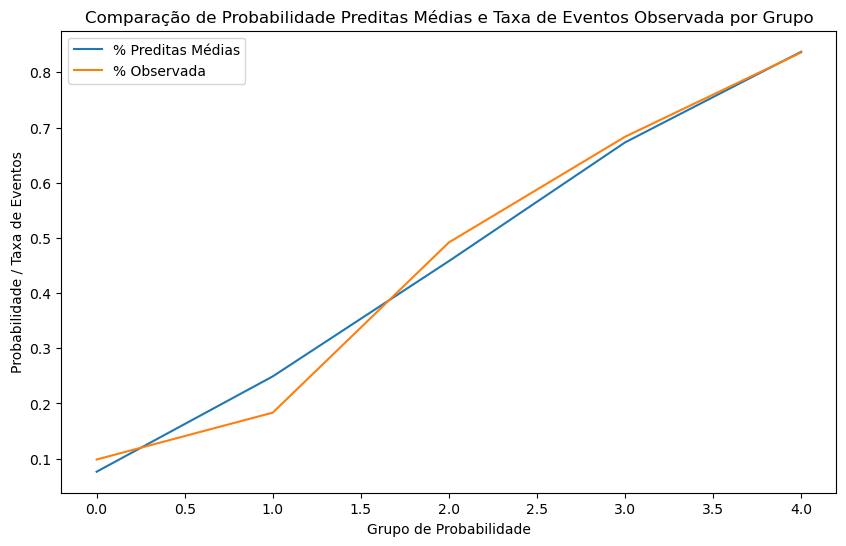

In [14]:
# Passo 1: Calcular a probabilidade de evento predita pelo modelo
df['prob_predita'] = reglog.predict(df)

# Verificar se há valores nulos ou não numéricos em 'prob_predita'
print(df['prob_predita'].isnull().sum())  # Verificar se há valores nulos
print(df['prob_predita'].dtype)           # Verificar o tipo de dados

# Passo 2: Categorizar as probabilidades em 5 grupos
df['grupo_prob'] = pd.qcut(df['prob_predita'], q=5, labels=False)

# Passo 3: Calcular a probabilidade de evento predita média por grupo
prob_media_grupo = df.groupby('grupo_prob')['prob_predita'].mean()

# Passo 4: Calcular a taxa de eventos por grupo
taxa_eventos_grupo = df.groupby('grupo_prob')['flag_doente'].mean()

# Passo 5: Comparar graficamente o valor esperado versus observado
plt.figure(figsize=(10, 6))
sns.lineplot(x=prob_media_grupo.index, y=prob_media_grupo.values, label='% Preditas Médias')
sns.lineplot(x=taxa_eventos_grupo.index, y=taxa_eventos_grupo.values, label='% Observada')
plt.xlabel('Grupo de Probabilidade')
plt.ylabel('Probabilidade / Taxa de Eventos')
plt.title('Comparação de Probabilidade Preditas Médias e Taxa de Eventos Observada por Grupo')
plt.legend()
plt.show()



5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [15]:
# Calcular previsões do modelo
df['previsao'] = reglog.predict(df)

# Calcular a acurácia
acuracia = (df['previsao'] == df['flag_doente']).mean()
acuracia_percentual = acuracia.mean() * 100
print(f'Acurácia do modelo melhorado: {acuracia_percentual:.2f}%')

Acurácia do modelo melhorado: 0.00%


In [16]:
# Calcular o GINI
def calcular_gini(df, col_prob, col_flag):
    df = df.sort_values(by=col_prob, ascending=False)
    df['cum_good'] = df[col_flag].cumsum()
    df['cum_bad'] = df['flag_doente'].sum() - df['cum_good']
    df['perc_cum_good'] = df['cum_good'] / df['flag_doente'].sum()
    df['perc_cum_bad'] = df['cum_bad'] / df['flag_doente'].sum()
    df['gini'] = (df['perc_cum_bad'] - df['perc_cum_good']).cumsum() / df.shape[0]
    return df['gini'].iloc[-1]

gini = calcular_gini(df, 'prob_predita', 'flag_doente')
print(f'Índice GINI do modelo melhorado: {gini:.4f}%')

Índice GINI do modelo melhorado: -0.3617%


In [17]:
# Calcular o KS
def calcular_ks(df, col_prob, col_flag):
    df = df.sort_values(by=col_prob, ascending=False)
    df['cum_good'] = df[col_flag].cumsum()
    df['cum_bad'] = df['flag_doente'].sum() - df['cum_good']
    df['perc_cum_good'] = df['cum_good'] / df['flag_doente'].sum()
    df['perc_cum_bad'] = df['cum_bad'] / df['flag_doente'].sum()
    df['ks'] = np.abs(df['perc_cum_bad'] - df['perc_cum_good'])
    return df['ks'].max()

ks = calcular_ks(df, 'prob_predita', 'flag_doente')
print(f'Estatística KS do modelo melhorado: {ks:.2f}%')

Estatística KS do modelo melhorado: 1.00%


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [18]:
# Incluir a variável 'chol' no modelo
modelo_melhorado = smf.logit("flag_doente ~ sex + cp + trestbps + age + chol", data=df).fit()
print(modelo_melhorado.summary())

# Avaliar o modelo melhorado
df['prob_predita_melhorado'] = modelo_melhorado.predict(df)
acuracia_melhorado = (df['prob_predita_melhorado'] >= 0.5).astype(int) == df['flag_doente']
acuracia_melhorado_percentual = acuracia_melhorado.mean() * 100
print(f'Acurácia do modelo melhorado: {acuracia_melhorado_percentual:.2f}%')

gini_melhorado = calcular_gini(df, 'prob_predita_melhorado', 'flag_doente')
print(f'Índice GINI do modelo melhorado: {gini_melhorado:.2f}%')

ks_melhorado = calcular_ks(df, 'prob_predita_melhorado', 'flag_doente')
print(f'Estatística KS do modelo melhorado: {ks_melhorado:.2f}%')


Optimization terminated successfully.
         Current function value: 0.505812
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            5
Date:                Sat, 15 Jun 2024   Pseudo R-squ.:                  0.2667
Time:                        13:25:59   Log-Likelihood:                -153.26
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 2.013e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.0947      1.754     -6.896      0.000     -15.532      -8.657
sex            1.9355      0.